# Final Project DigitalSkola
# BATCH 54

##

---

# Team Logos Data
- Irma
- Pipih
- Rafi
- Axel
- Fia
- Ananda
- Dafha

# **Problem**
Dalam proyek ini, kami mendalami tantangan krusial dalam prakiraan meteorologi di lanskap iklim Australia yang beragam. Kami memanfaatkan dataset observasi cuaca harian yang komprehensif dari **Australian Bureau of Meteorology (BOM).**

Dataset ini merekam **data cuaca harian selama sepuluh tahun** dari berbagai stasiun pemantauan di seluruh benua. Tujuan utama kami adalah **mengembangkan model klasifikasi biner** yang tangguh (robust), yang **mampu memprediksi secara akurat** apakah hujan akan turun keesokan harinya (RainTomorrow) berdasarkan parameter atmosfer hari ini.

Kami bertujuan untuk mentransformasi data mentah meteorologi seperti suhu, kelembaban, kecepatan angin, dan tekanan—menjadi fitur prediksi berkualitas tinggi. Tantangan signifikan dalam domain ini adalah menangani **ketidakseimbangan data (imbalanced data)**, di mana jumlah hari kering jauh melebihi jumlah hari hujan. Kondisi ini menuntut penerapan teknik pra-pemrosesan khusus, **seperti SMOTE atau Class Weighting**, untuk memastikan hasil prediksi yang adil dan tidak bias.

Berlandaskan hal tersebut, kami akan mengevaluasi berbagai algoritma Machine Learning untuk mengidentifikasi model dengan performa terbaik. Pada akhirnya, sistem prediksi curah hujan yang akurat memiliki peran vital dalam mendukung pengambilan keputusan strategis di **sektor pertanian, manajemen bencana, serta perencanaan aktivitas harian,** sehingga dapat memitigasi risiko yang timbul akibat pola cuaca yang tidak menentu.

# **Objectives**
- **Data Cleaning & Exploration**:
Membersihkan dataset dengan menangani missing values dan outliers yang umum terjadi pada data sensor cuaca, serta melakukan Eksplorasi Data (EDA) untuk memahami distribusi dan korelasi antar variabel meteorologi.

- **Data Preprocessing**: Mempersiapkan data agar siap dilatih, meliputi encoding variabel kategorikal, scaling fitur numerik, dan secara khusus menangani imbalanced data menggunakan teknik resampling (seperti SMOTE) atau penyesuaian bobot kelas.

- **Feature Engineering**: Mengekstrak informasi baru dari data mentah, seperti memecah variabel tanggal menjadi fitur musiman (bulan/tahun) dan mengonversi variabel arah angin, guna memperkaya informasi bagi model.

- **Predictive Modeling**: Membangun dan melatih berbagai algoritma Machine Learning klasifikasi (seperti Logistic Regression, Random Forest, dan XGBoost) untuk memprediksi probabilitas terjadinya hujan.

- **Model Evaluation & Selection**: Mengevaluasi kinerja model menggunakan metrik yang relevan untuk kasus data tidak seimbang—seperti Recall, Precision, F1-Score, dan ROC-AUC—guna memilih model terbaik yang sensitif dalam mendeteksi hari hujan.

# **0.&nbsp;Connect to G-Drive and Load Dataset**

In [ ]:
#!pip install gdown
import gdown
drive_url = 'https://drive.google.com/file/d/1G1SjqBK578dIV8UKL0VYWxZTHIeTuwIj/view?usp=sharing'
output_file = 'weatherAUS.csv'
gdown.download(drive_url, output_file, fuzzy=True)
df = pd.read_csv(output_file)

In [ ]:
df

# **Setup And Initialization**

# 1.1. Importing Necessary Libraries
Pertama-tama, kita akan mengimpor semua pustaka esensial yang akan digunakan sepanjang proyek ini. Pustaka dikelompokkan berdasarkan fungsinya untuk menjaga struktur kode yang rapi dan mudah dipahami:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# classifier options
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
# libraries for evaluating model performance
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# **1.2. Data Description**
Dataset ini berisi observasi cuaca harian dari berbagai stasiun meteorologi di seluruh Australia. Berikut adalah deskripsi mendetail untuk setiap variabel:

| Variabel | Deskripsi | Tipe Data |
| :--- | :--- | :--- |
| `Date` | Tanggal observasi cuaca. | Datetime |
| `Location` | Nama lokasi stasiun cuaca. | Object (Categorical) |
| `MinTemp` | Temperatur minimum dalam derajat Celcius. | Float |
| `MaxTemp` | Temperatur maksimum dalam derajat Celcius. | Float |
| `Rainfall` | Curah hujan yang tercatat hari itu dalam mm. | Float |
| `Evaporation` | Evaporasi (penguapan) Kelas A dalam mm (hingga jam 9 pagi). | Float |
| `Sunshine` | Jumlah jam cerah matahari (*bright sunshine*). | Float |
| `WindGustDir` | Arah hembusan angin terkuat dalam 24 jam (hingga tengah malam). | Object (Categorical) |
| `WindGustSpeed` | Kecepatan hembusan angin terkuat (km/jam). | Float |
| `Humidity9am` | Kelembaban relatif pada pukul 9 pagi (persen). | Float |
| `Humidity3pm` | Kelembaban relatif pada pukul 3 sore (persen). | Float |
| `Pressure9am` | Tekanan atmosfer pada pukul 9 pagi (hpa). | Float |
| `Pressure3pm` | Tekanan atmosfer pada pukul 3 sore (hpa). | Float |
| `Cloud9am` | langit yang tertutup awan pada jam 9 pagi (satuan "oktas", 0-8). | Float |
| `Cloud3pm` | langit yang tertutup awan pada jam 3 sore. | Float |
| `RainToday` | Apakah Hari ini Hujan? (Yes/No). | Object (Binary) |
| **`RainTomorrow`** | **Target Variable**: Apakah besok akan hujan? (Yes/No). | **Object (Binary)** |

# **2. Initial Data Analysis**
Setelah memuat data, langkah selanjutnya adalah memahami struktur, tipe data, dan distribusi statistik dasar untuk mengidentifikasi anomali atau kebutuhan pembersihan data lebih lanjut.

## **2.1. Dataset Overview**
Pertama, kita akan melihat sampel data teratas dan informasi teknis mengenai tipe data serta penggunaan memori.

In [ ]:
# Menampilkan 5 baris pertama
display(df.head())

# Mengecek dimensi data dan tipe variabel
print(f"Shape of dataset: {df.shape}")
print("-" * 30)
df.info()

### **2.1.1. Overview Inference**
Berdasarkan output di atas, kita dapat menarik beberapa kesimpulan awal:

- **Volume** Data: Dataset ini cukup besar, terdiri dari sekitar 145.460 baris dan 23 kolom. Jumlah data yang besar ini baik untuk melatih model Deep Learning atau Ensemble (XGBoost/Random Forest).

- **Tipe** Data: Mayoritas kolom adalah numerik (float64), yang cocok untuk input model. Namun, terdapat kolom kategorikal (object) seperti Location, WindGustDir, WindDir9am, dan WindDir3pm yang nantinya memerlukan proses Encoding.

- **Missing** Values: Dari fungsi df.info(), terlihat jelas bahwa beberapa kolom (seperti Evaporation, Sunshine, Cloud9am, Cloud3pm) memiliki jumlah non-null yang jauh lebih sedikit dibandingkan total baris. Ini mengindikasikan adanya missing values yang signifikan yang harus ditangani pada tahap Data Cleaning.

- **Target** Variable: Kolom RainTomorrow masih dalam format objek (Yes/No) dan perlu diubah menjadi biner (0/1).

# **2.2. Summary Statistics**
Selanjutnya, kita akan memeriksa statistik deskriptif untuk melihat distribusi data, tendensi sentral (mean/median), dan penyebaran (standar deviasi).

In [ ]:
# Statistik untuk kolom Numerik
display(df.describe())

In [ ]:
# Statistik untuk kolom Kategorikal
display(df.describe(include=['object']).T)

### 2.2.1. Summary Inference
Analisis statistik deskriptif di atas memberikan wawasan mendalam mengenai karakteristik dataset cuaca Australia:

**A. Numerical Variables:**
* **Rainfall (Curah Hujan):**
    * Rata-rata curah hujan sangat rendah (~2.3 mm), namun nilai maksimum mencapai angka ekstrem (**371 mm**).
    * Disparitas besar antara nilai *mean* dan *max*, serta standar deviasi yang tinggi, mengindikasikan distribusi yang **sangat miring ke kanan (*heavily right-skewed*)**. Ini menyiratkan banyaknya *outliers* (hari-hari dengan badai ekstrem) yang perlu ditangani, misalnya dengan transformasi Logaritma atau penggunaan *Robust Scaler*.
* **Temperature (MinTemp & MaxTemp):**
    * Rentang suhu sangat dinamis, mulai dari **-8.5°C** (musim dingin ekstrem) hingga **48.1°C** (gelombang panas). Variasi ini masuk akal secara meteorologis untuk benua Australia dan kemungkinan besar bukan *error* input.
    * Model yang dibangun harus mampu menangkap pola non-linear dari fluktuasi suhu ekstrem ini.
* **WindGustSpeed (Kecepatan Angin):**
    * Kecepatan angin maksimum tercatat **135 km/jam**, yang jauh di atas rata-rata (~40 km/jam). Nilai ekstrem ini kemungkinan merepresentasikan kejadian badai atau siklon tropis yang valid.

**B. Categorical Variables:**
* **RainTomorrow (Target Variable):**
    * Frekuensi nilai "No" (Tidak Hujan) jauh mendominasi dibandingkan "Yes" (Hujan). Secara umum, rasio kelas mayoritas berkisar di angka 77-78%.
    * **Implikasi:** Kita menghadapi kasus **Imbalanced Data**. Akurasi (*Accuracy*) tidak akan menjadi metrik evaluasi yang valid. Kita harus memprioritaskan metrik sensitivitas seperti **Recall** dan **ROC-AUC**, serta menerapkan teknik *resampling* (seperti SMOTE) atau *Class Weighting* pada tahap *preprocessing*.
* **Location:**
    * Terdapat 49 lokasi stasiun cuaca unik. Tingginya kardinalitas ini berisiko menciptakan terlalu banyak fitur jika menggunakan metode *One-Hot Encoding* standar. Strategi *Target Encoding* atau *Binary Encoding* mungkin lebih efisien untuk menjaga dimensi data.
* **WindGustDir:**
    * Arah angin dominan ("top") bervariasi tergantung pada musim dan lokasi. Karena variabel ini bersifat siklik (arah mata angin), teknik *encoding* trigonometri (Sin/Cos) mungkin lebih efektif daripada *label encoding* biasa untuk mempertahankan informasi spasial arah angin.

# **2.3. Data Quality & Integrity Check**

## **2.3.1. Missing Values:**

In [ ]:
# Menghitung persentase missing value di setiap kolom
missing_percentage = df.isnull().sum() / len(df) * 100
missing_summary = pd.DataFrame({'Missing %': missing_percentage})
print(missing_summary[missing_summary['Missing %'] > 0].sort_values('Missing %', ascending=False))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung persentase
missing_percent = df.isnull().sum() / len(df) * 100

# Filter dari terbesar ke terkecil (Descending)
missing_data = missing_percent[missing_percent > 0].sort_values(ascending=False)

# VISUALISASI
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=missing_data.index, y=missing_data.values, palette='Reds_r')

plt.title('Persentase Missing Values per Variabel', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Persentase Hilang (%)', fontsize=12)
plt.xlabel('Nama Kolom', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

# 4. MENAMBAHKAN LABEL ANGKA DI ATAS BATANG
for i, v in enumerate(missing_data.values):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## **2.3.2. Data Unique and Duplicate Check:**

In [ ]:
cols = df.columns.tolist()
for col in cols :
  print(f"\n{col} : {df[col].unique()}")
  print(f"Jumlah {col} : {len(df[col].unique())}")

In [ ]:
cols = df.columns.tolist()
for col in cols :
  print(f"\n {df[col].value_counts()}")

In [ ]:
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

# Jika ingin melihat datanya:
# display(df[df.duplicated()])

# **2.4. Univariate Analysis**

## **2.4.1. Target Distribution (Imbalance Check):**

In [ ]:
# Cek proporsi target
target_counts = df['RainTomorrow'].value_counts(normalize=True) * 100
print("\nProporsi Target (RainTomorrow):")
print(target_counts)

# Visualisasi simpel
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribusi Rain Tomorrow')
plt.show()

### **Kesimpulan**
* **Statistik:** Rasio kelas adalah sekitar **78% No (Kering)** berbanding **22% Yes (Hujan)**.
    * **Critical Imbalance:** Akurasi prediksi model berpotensi akan selalu tebak 'No' . Oleh karena itu, **Akurasi** tidak bisa dijadikan metrik utama. Gunakan **F1-Score, ROC-AUC, atau Recall**.
    * **Preprocessing:** Wajib menerapkan teknik penyeimbang seperti **SMOTE** (Synthetic Minority Over-sampling Technique) atau **Class Weighting** pada fungsi *loss* model.

## **2.4.2. Numerical Distributions :**

In [ ]:
# Setup Style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
# Palette custom: Biru untuk Hujan, Abu-abu untuk Tidak
custom_palette = {"Yes": "#1f77b4", "No": "#d62728"}

In [ ]:
# Ambil kolom numerik
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Setup Grid Layout
n_cols = 3  # Jumlah grafik ke samping
n_rows = -(-len(numeric_cols) // n_cols) # Hitung butuh berapa baris ke bawah

plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    # Plot Histogram dengan garis kurva (KDE)
    sns.histplot(df[col], kde=True, bins=30, color='#1f77b4', line_kws={'linewidth': 2})

    plt.title(f'Distribusi: {col}')
    plt.xlabel('')
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

### **Kesimpulan**
Visualisasi histogram di atas memetakan distribusi frekuensi dari setiap variabel numerik. Dari bentuk kurva dan penyebarannya, kita dapat mengelompokkan variabel ke dalam tiga karakteristik utama yang menentukan strategi *preprocessing* kita:

#### **A. Distribusi Gaussian (Normal)**
Kelompok ini memiliki bentuk lonceng (*Bell-Curve*) yang simetris atau hampir simetris.
* **Variabel:** `MinTemp`, `MaxTemp`, `Temp9am`, `Temp3pm`, `Pressure9am`, `Pressure3pm`, `Humidity3pm`.
* **Visual Insight:**
    * Variabel **Tekanan Udara (Pressure)** memiliki distribusi yang normal. Ini menunjukkan bahwa tekanan atmosfer cenderung stabil di sekitar nilai rata-rata (1015-1017 hPa).
    * Variabel **Suhu (Temp)** juga mendekati normal, meskipun sedikit melebar, mencerminkan variasi musiman yang alami.

#### **B. Distribusi Heavily Right-Skewed (Miring ke Kanan)**
Kelompok ini memiliki ekor panjang ke kanan, di mana mayoritas data berkumpul di nilai rendah (kiri).
* **Variabel:** `Rainfall`, `Evaporation`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`.
* **Visual Insight:**
    * **Rainfall (Curah Hujan):** Ini adalah distribusi paling ekstrem. Hampir seluruh bar berkumpul di angka 0 (hari tidak hujan), dengan *tail* yang sangat tipis memanjang ke kanan. Ini mengonfirmasi bahwa hujan adalah *event* yang jarang namun bisa bernilai ekstrem.
    * **WindSpeed (Kecepatan Angin):** Mayoritas hari memiliki angin tenang hingga sedang, namun ekor kanan menunjukkan adanya kejadian badai (*gust*) yang signifikan.
* **Solusi :**
    * Data ini **tidak boleh** langsung dimasukkan ke model linear tanpa transformasi, karena akan bias terhadap nilai rendah.
    * **Wajib** dilakukan transformasi untuk memampatkan *tail* tersebut agar distribusi lebih mendekati normal. Metode yang disarankan: **Log Transformation (`np.log1p`)** atau **Box-Cox Transformation**.

#### **C. Distribusi Unik & Bimodal**
Kelompok ini memiliki pola distribusi yang tidak standar.
* **Sunshine (Sinar Matahari):**
    * Terlihat pola yang agak tidak beraturan dengan lonjakan frekuensi di nilai 0 (mendung total) dan nilai tinggi (cerah total).
* **Cloud9am & Cloud3pm (Awan):**
    * Grafik terlihat "bergelombang" dengan celah-celah. Ini terjadi karena pengukuran awan menggunakan satuan **Oktas (0-8)** yang bersifat diskret (bilangan bulat), bukan kontinu.
    * Terlihat lonjakan pada nilai 0 (langit bersih) dan 8 (mendung total/overcast).
* **Humidity9am (Kelembaban Pagi):**
    * Berbeda dengan sore hari (`Humidity3pm`) yang normal, kelembaban pagi cenderung menumpuk di nilai tinggi (70-100%). Ini wajar karena suhu pagi yang dingin meningkatkan kelembaban relatif.
* **Solusi:**
    * Untuk `Cloud`, pertimbangkan memperlakukannya sebagai variabel **Ordinal** atau Kategorikal, bukan numerik murni.
    * Untuk `Humidity9am`, transformasi data mungkin tidak terlalu berpengaruh, namun *scaling* tetap diperlukan (MinMax Scaler cocok karena batasnya jelas 0-100).

## **2.4.3. Categorical Distributions**:

In [ ]:
# Ambil kolom kategorikal, buang Date karena bukan kategori diskrit
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = [c for c in cat_cols if c != 'Date']

# Setup Grid Layout
n_cols = 2
n_rows = -(-len(cat_cols) // n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(cat_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    # Urutkan berdasarkan jumlah terbanyak agar rapi
    order = df[col].value_counts().index

    sns.countplot(data=df, x=col, order=order, palette='viridis')

    plt.title(f'Frekuensi Kategori: {col}')
    plt.xlabel('')

    # Jika kolom adalah Location, putar label 90 derajat agar tidak bertumpuk
    if col == 'Location':
        plt.xticks(rotation=90, fontsize=8)
    else:
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### **Kesimpulan**
Visualisasi distribusi frekuensi pada fitur kategorikal mengungkapkan karakteristik demografi data, bias sampling, dan tantangan ketidakseimbangan kelas (*class imbalance*).

#### **A. Target Variable & Persistence (RainTomorrow & RainToday)**
* **Visual:** Kedua plot menunjukkan ketidakseimbangan yang ekstrem. Bar 'No' (Biru/Ungu) mendominasi secara signifikan dibandingkan 'Yes' (Hijau/Kuning).
* **Statistik:** Rasio kelas adalah sekitar **78% No (Kering)** berbanding **22% Yes (Hujan)**.
    * **Critical Imbalance:** Akurasi prediksi model berpotensi akan selalu tebak 'No' . Oleh karena itu, **Akurasi** tidak bisa dijadikan metrik utama. Gunakan **F1-Score, ROC-AUC, atau Recall**.
    * **Preprocessing:** Wajib menerapkan teknik penyeimbang seperti **SMOTE** (Synthetic Minority Over-sampling Technique) atau **Class Weighting** pada fungsi *loss* model.

#### **B. Wind Direction Dynamics (Arah Angin)**
Analisis ketiga fitur arah angin (`WindGustDir`, `WindDir9am`, `WindDir3pm`) menunjukkan pola dinamis yang menarik:
* **WindGustDir (Angin Kencang):**
    * Didominasi oleh arah **Barat (W)**. Ini mencerminkan pola *Westerlies* yang membawa front cuaca dari Samudra Hindia, yang sering diasosiasikan dengan badai.
* **WindDir9am (Pagi Hari):**
    * Didominasi oleh arah **Utara (N)**. Pada pagi hari, angin darat (*Land Breeze*) atau sisa angin monsun sering bertiup dari utara/interior yang lebih hangat.
* **WindDir3pm (Sore Hari):**
    * Terjadi pergeseran drastis. Dominasi berpindah ke arah **Selatan/Tenggara (SE/S)**. Ini adalah bukti fenomena **Sea Breeze** (angin laut) yang masuk ke daratan saat sore hari untuk mendinginkan suhu daratan.
* **Encoding Strategy:** Karena arah angin memiliki siklus (Utara di 0 derajat dekat dengan Barat Laut di 315 derajat), penggunaan *Label Encoding* biasa akan menghilangkan informasi spasial ini. **Sangat disarankan** menggunakan **Cyclic Encoding (Transformasi Sin/Cos)** agar model memahami kontinuitas arah mata angin.

#### **C. Spatial Distribution (Location)**
* **Visual:** Terdapat 49 lokasi stasiun cuaca. Distribusi tidak seragam sempurna. Stasiun di kota besar (Sydney, Melbourne, Canberra) memiliki jumlah observasi lebih banyak (~3000+) dibandingkan lokasi terpencil (Uluru, Katherine ~1500).
* **Insight:** Terdapat bias sampling spasial. Data lebih merepresentasikan wilayah pesisir selatan yang berpopulasi padat dibanding wilayah gurun atau tropis utara.
    * Risiko model menjadi *bias* terhadap pola cuaca perkotaan selatan.
    * **Encoding:** Jangan gunakan *One-Hot Encoding* (akan menambah 49 kolom baru yang *sparse*). Gunakan **Target Encoding** atau kelompokkan lokasi berdasarkan **Zona Iklim (Region)** untuk efisiensi.


## **2.5. Outlier Detection Analysis (Analisis Pencilan)**

In [ ]:
import math

# Pilih kolom numerik untuk dicek (contoh: curah hujan dan kecepatan angin)
cols_to_check = df.select_dtypes(include=['number']).columns
n_features = len(cols_to_check)

# 2. Setup Grid
n_cols = 4
n_rows = math.ceil(n_features / n_cols)
plt.figure(figsize=(23, 20))

for i, col in enumerate(cols_to_check):
    plt.subplot(n_rows, n_cols, i+1)  # Use dynamically calculated n_rows and n_cols
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

In [ ]:
def cek_persentase_outlier(df):
    # Hanya ambil kolom numerik
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    outlier_list = []

    for col in numeric_cols:
        # Hitung Q1 (25%) dan Q3 (75%)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Tentukan batas bawah dan atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Hitung jumlah data yang keluar dari batas (outlier)
        total_outlier = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        percentage = (total_outlier / len(df)) * 100

        outlier_list.append({
            'Nama Kolom': col,
            'Jumlah Outlier': total_outlier,
            'Persentase (%)': round(percentage, 2),
            'Skewness': round(df[col].skew(), 2) # Tambahan: Cek kemiringan data
        })

    # Buat dataframe hasil
    outlier_df = pd.DataFrame(outlier_list)

    # Urutkan dari persentase tertinggi
    return outlier_df.sort_values(by='Persentase (%)', ascending=False)

# Jalankan fungsi
laporan_outlier = cek_persentase_outlier(df)
display(laporan_outlier)

### **Kesimpulan**
Visualisasi Boxplot digunakan untuk mendeteksi pencilan (*outliers*) dan memahami penyebaran data. Analisis menunjukkan bahwa dataset memiliki variabilitas ekstrem yang valid secara meteorologis.

#### **A. Highly Skewed Features (Curah Hujan & Angin)**
Kelompok ini memiliki distribusi *Right-Skewed* yang ekstrem dengan banyak *outliers* di sisi atas.
* **Rainfall (Curah Hujan):**
    * **Visual:** Distribusi yang sangat miring dan memiliki *outliers* ekstrem hingga ~350mm.
    * **Insight Meteorologis:** Mayoritas hari di Australia adalah kering, tetapi *outliers* merepresentasikan kejadian hujan deras akibat Siklon Tropis (di Utara) atau *Cold Fronts* (di Selatan).
* **WindGustSpeed & WindSpeed (Kecepatan Angin):**
    * **Visual:** Median ~40 km/h dengan *outliers* memanjang hingga >140 km/h (badai).
    * **Insight Meteorologis:** Kecepatan ekstrem ini valid dan terkait dengan badai atau *thunderstorms*, terutama di wilayah pantai timur.
* **Evaporation:**
    * **Visual:** Miring ke kanan dengan banyak *outliers* atas (>15mm).
    * **Insight:** Tingkat penguapan ekstrem terjadi pada hari-hari musim panas yang kering dan berangin di wilayah pedalaman.

#### **B. Symmetric/Normal Features (Suhu & Tekanan)**
Kelompok ini memiliki distribusi yang mendekati Normal (Gausian) dengan *outliers* yang relatif sedikit dan simetris.
* **Temperature (Min, Max, Temp9am, Temp3pm):**
    * **Visual:** terlihat simetris, *Outliers* bawah (< -5°C) mewakili gelombang dingin, sedangkan *outliers* atas (> 45°C) mewakili gelombang panas (*Heatwaves*).
* **Pressure (9am & 3pm):**
    * **Visual:** Sangat simetris dengan median ~1015-1017 hPa.
    * **Insight:** *Outliers* bawah (<990 hPa) adalah indikator kuat sistem badai/siklon (*Low Pressure*), sedangkan atas (>1040 hPa) adalah sistem antisiklon kering (*High Pressure*).

#### **C. Bounded Features (Kelembaban & Langit)**
Kelompok ini dibatasi oleh rentang waktu atau persen (0-100% atau 0-24 jam).
* **Humidity (9am & 3pm):**
    * **Visual:** *Skewed Left*. Lebih banyak *outliers* di sisi bawah (kering ekstrem <10-20%).
    * **Insight:** Kelembaban rendah umum terjadi di wilayah gurun. Data >100% adalah *error* pengukuran yang harus di-*clip* ke 100.
* **Cloud & Sunshine:**
    * **Visual:** Terlihat cukup Tersebar, *Sunshine* memiliki distribusi uniform, sedangkan *Cloud* bersifat diskret (0-9 oktas).

---
### **Kesimpulan Strategi Outliers**
1.  **Validitas Data:** Hampir seluruh *outliers* dalam dataset ini merepresentasikan fenomena cuaca nyata (Badai, Gelombang Panas, Kekeringan), bukan *error* input.
2.  **Keputusan Preprocessing:** Kita **tidak akan menghapus outliers** baris demi baris karena akan menghilangkan informasi tentang kejadian ekstrem (kelas minoritas 'Yes').
3.  **Transformasi:**
    * Fitur *Skewed* (Rainfall, Wind) -> **Log Transform** atau **Robust Scaler**.
    * Fitur *Normal* (Temp, Pressure) -> **Standard Scaler**.

# **2.6. Bivariate Analysis (Hubungan Antar Variabel)**

## **2.6.1. Correlation Matrix (Heatmap):**

In [ ]:
# Hitung korelasi antar kolom numerik
# Kita gunakan numeric_only=True karena korelasi hanya untuk angka
correlation = df.corr(numeric_only=True)

plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True,fmt = ".2f", cmap='coolwarm', linewidths= 0.5)
plt.title("Heatmap Korelasi Awal")
plt.show()

In [ ]:
#Menampilkan Korelasi Fitur Numerik terhadap Fitur Target
df_corr = df.copy()

# Ubah Target menjadi Angka (Yes=1, No=0)
df_corr['RainTomorrow'] = df_corr['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Hitung Korelasi fitur numerik
correlation = df_corr.corr(numeric_only=True)

# Setting agar korelasi hanya terhadap 'RainTomorrow'
target_corr = correlation['RainTomorrow'].sort_values(ascending=False)

# Visualisasi Fokus ke Target
plt.figure(figsize=(8, 10))
sns.heatmap(target_corr.drop('RainTomorrow').to_frame(),
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            cbar=True)

plt.title('Korelasi Fitur Numerik terhadap Fitur Target')
plt.show()

### **Kesimpulan**
Heatmap korelasi di atas digunakan untuk mendeteksi *multicollinearity* (korelasi antar prediktor) dan mengidentifikasi pola hubungan meteorologis. Berikut adalah analisis mendalam per kelompok variabel:

#### **A. Temperature Cluster (Suhu)**
* **Visual:** Terdapat blok korelasi positif yang sangat kuat (warna merah tua). Pasangan **MaxTemp vs. Temp3pm** memiliki korelasi hampir sempurna (**r=0.98**), dan **MinTemp vs. Temp9am** (**r=0.90**).
* **Insight Meteorologis:** Hal ini mencerminkan siklus diurnal (harian) termodinamika. Suhu pagi (9am) adalah fondasi bagi suhu siang (Max), dan suhu sore (3pm) biasanya mendekati suhu maksimum harian.
* **High Multicollinearity Risk**. Korelasi > 0.9 dapat menyebabkan koefisien model linear (Logistic Regression) menjadi tidak stabil (*inflate variance*).
    * **Solusi:** Pilih salah satu fitur yang redundan (misal: Pertahankan `MaxTemp`, buang `Temp3pm`) atau gunakan teknik **PCA** (*Principal Component Analysis*) untuk mereduksi dimensi tanpa kehilangan informasi.

#### **B. Atmospheric Pressure Cluster (Tekanan Udara)**
* **Visual:** Korelasi positif ekstrem antara **Pressure9am vs. Pressure3pm** (**r=0.96**).
* **Insight Meteorologis:** Sistem tekanan udara (Siklon/Antisiklon) adalah fenomena berskala besar yang perubahannya terjadi secara gradual, sehingga tekanan pagi dan sore sangat identik.
* Fitur ini sangat redundan. Disarankan untuk **menggabungkan keduanya** (rata-rata tekanan harian) atau membuang salah satu untuk efisiensi model.

#### **C. Humidity, Cloud, & Sunshine (Kelembaban & Penyinaran)**
* **Visual:** Terdapat korelasi negatif yang kuat (warna biru) antara **Sunshine vs. Cloud3pm** (**r=-0.70**) dan **Humidity3pm vs. Sunshine** (**r=-0.63**).
* **Insight Meteorologis:** Saat kelembaban dan awan tinggi (mendung), durasi penyinaran matahari otomatis rendah. Di musim hujan tropis Australia, *Low-Pressure Troughs* meningkatkan kelembaban sekaligus memblokir matahari.
* Hubungan negatif yang kuat ini berguna. Jika variabel `Sunshine` memiliki banyak *missing values*, variabel `Cloud` dapat digunakan sebagai *proxy* (pengganti) yang efektif, atau sebaliknya.

#### **D. Wind Cluster (Angin)**
* **Visual:** Korelasi moderat (warna oranye muda). **WindGustSpeed vs. WindSpeed3pm** (**r=0.69**).
* **Insight Meteorologis:** Angin kencang (*Gust*) berkorelasi dengan kecepatan angin sore karena efek turbulensi dan pemanasan konvektif sore hari. Namun, korelasinya tidak ekstrem, menandakan bahwa *Gust* membawa informasi unik (kejadian badai sesaat) yang berbeda dengan angin rata-rata.
* Kedua fitur cukum aman digunakan bersamaan. Fitur ini cukup independen dan baik untuk memberikan diversitas pada model *Ensemble* (Random Forest/XGBoost). Pertimbangkan membuat fitur interaksi (misal: `WindSpeed * WindDir`).

---
### **Kesimpulan Strategi Korelasi**
1.  **Redundansi Kritis:** Pasangan `Pressure9am-3pm` dan `Temp3pm-MaxTemp` harus ditangani (drop salah satu atau rata-rata) untuk mencegah *Overfitting* pada model linear.
2.  **Validasi Domain:** Pola korelasi (negatif antara Sunshine dengan Cloud) memvalidasi kualitas data (sensor bekerja sesuai logika fisika atmosfer).

## **2.6.2. Distribusi Fitur Numerical Terhadap Fitur Target :**

In [ ]:
# Ambil semua kolom numerik
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Hapus kolom yang tidak relevan untuk plot (jika ada, misal year/month jika sudah diekstrak)
# num_cols = num_cols.drop(['Month']) # Opsional

# Setup layout grid (misal 4 kolom per baris)
n_cols = 4
n_rows = -(-len(num_cols) // n_cols)  # Ceiling division

plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    # Gunakan Boxplot untuk melihat median dan outlier
    sns.boxplot(data=df, x='RainTomorrow', y=col, palette={"Yes": "#1f77b4", "No": "#d62728"})

    # Alternatif: Gunakan Violinplot untuk melihat bentuk distribusi
    # sns.violinplot(data=df, x='RainTomorrow', y=col, palette={"Yes": "#1f77b4", "No": "#d62728"})

    plt.title(f'{col} vs RainTomorrow')
    plt.xlabel('')

plt.tight_layout()
plt.show()

### **Kesimpulan**
Analisis hubungan bivariat antara fitur numerik dan target `RainTomorrow` menggunakan Boxplot mengungkapkan pola distribusi yang berbeda secara signifikan. Berikut adalah analisis mendalam berdasarkan kategori meteorologi:

#### **A. Temperature Features (Suhu)**
* **MinTemp (Suhu Minimum):**
    * **Visual:** Median untuk kelas 'Yes' (~14°C) lebih tinggi dibandingkan 'No' (~11°C). Boxplot 'Yes' memiliki IQR yang lebih sempit namun *whiskers* memanjang ke atas.
    * **Insight Meteorologis:** Suhu minimum yang lebih hangat sering terjadi pada malam sebelum hujan karena kelembaban tinggi (awan) menahan panas bumi agar tidak lepas ke atmosfer (efek rumah kaca lokal).
    * **ML Strategy:** Fitur ini berguna untuk model non-linear. Disarankan menggunakan *Standard Scaler* karena distribusi mendekati normal.
* **MaxTemp (Suhu Maksimum) & Temp3pm:**
    * **Visual:** Kebalikan dari MinTemp, median 'Yes' (~20°C) justru lebih rendah daripada 'No' (~24°C).
    * **Insight Meteorologis:** Suhu maksimum yang rendah mengindikasikan adanya tutupan awan (mendung) atau sistem tekanan rendah yang menghalangi pemanasan matahari di siang hari.
    * **ML Strategy:** Prediktor yang moderat. Perlu penanganan *outliers* (misal: *winsorizing*) agar tidak bias pada model sensitif seperti SVM.

#### **B. Moisture & Atmospheric Features (Kelembaban & Hujan)**
* **Rainfall (Curah Hujan Hari Ini):**
    * **Visual:** Distribusi sangat *skewed right*. Median 'Yes' ~2mm sedangkan 'No' hampir datar di 0mm. Banyak *extreme outliers*.
    * **Insight Meteorologis:** Hujan hari ini memiliki korelasi serial dengan hujan besok (sistem cuaca sering bertahan beberapa hari).
    * **ML Strategy:** Fitur krusial namun menantang karena *skewness*. Wajib melakukan **Log-Transformation** (`log(Rainfall+1)`) atau *binning* menjadi kategori. Gunakan metrik *Precision-Recall* karena ketidakseimbangan kelas.
* **Humidity9am & Humidity3pm:**
    * **Visual:** Salah satu pembeda paling jelas. Median `Humidity3pm` untuk 'Yes' (~65%) jauh lebih tinggi dibanding 'No' (~45%) dengan *overlap* minimal.
    * **Insight Meteorologis:** Kelembaban sore yang tinggi mendekati titik jenuh sering menjadi pemicu kondensasi (hujan) pada malam atau esok harinya.
    * **ML Strategy:** **Top Predictor**. Wajib diprioritaskan dalam *Feature Selection*.
* **Evaporation:**
    * **Visual:** Median 'Yes' lebih rendah (~3mm) dibanding 'No' (~5mm).
    * **Insight:** Tingkat penguapan rendah terjadi saat udara sudah jenuh (lembab) atau mendung, kondisi yang mendukung terjadinya hujan.
    * **ML Strategy:** Prediktor yang baik untuk *Ensemble Model*. Perlu strategi imputasi khusus (misal: median per lokasi) karena memiliki ~43% *missing values*.

#### **C. Sun & Cloud Features (Penyinaran & Awan)**
* **Sunshine (Jam Sinar Matahari):**
    * **Visual:** Median 'Yes' (4 jam) jauh lebih rendah drastis dibanding 'No' (9 jam).
    * **Insight:** Sedikitnya sinar matahari berbanding lurus dengan ketebalan awan. Di Australia utara, ini sangat kuat saat musim monsun.
    * **ML Strategy:** Fitur dengan *Importance* tinggi (sering menjadi *root node* di Decision Tree). Dapat digunakan sebagai *proxy* untuk mengisi *missing values* pada kolom Cloud.
* **Cloud9am & Cloud3pm:**
    * **Visual:** Median tutupan awan 'Yes' (6 oktas) jauh lebih tinggi dibanding 'No' (3 oktas).
    * **Insight:** Tutupan awan adalah indikator fisik langsung dari potensi presipitasi.
    * **ML Strategy:** Karena datanya diskret (0-8), fitur ini bisa diperlakukan sebagai variabel ordinal.

#### **D. Wind & Pressure Features (Angin & Tekanan)**
* **WindGustSpeed:**
    * **Visual:** Median 'Yes' (45 km/h) lebih tinggi dibanding 'No' (35 km/h) dengan banyak *outlier* ekstrem.
    * **Insight:** Angin kencang sering diasosiasikan dengan turbulensi front cuaca atau badai yang membawa hujan.
    * **ML Strategy:** Berguna untuk deteksi kejadian ekstrem. *Robust Scaler* disarankan untuk menangani *outliers*.
* **Pressure9am & Pressure3pm:**
    * **Visual:** Median 'Yes' lebih rendah dibanding 'No'.
    * **Insight:** Penurunan tekanan udara (*Low Pressure System*) adalah tanda fisik masuknya sistem badai.
    * **ML Strategy:** Korelasi antar kedua fitur ini sangat tinggi (*multicollinearity*). Pertimbangkan untuk menggabungkannya (rata-rata) atau membuang salah satu jika menggunakan Linear Regression.

---
### **Rekomendasi Preprocessing**
Berdasarkan analisis visual di atas, berikut adalah strategi teknis yang akan diterapkan:
1.  **Top Features:** Variabel `Humidity3pm`, `Sunshine`, `Cloud3pm`, dan `Pressure` menunjukkan perbedaan distribusi terbesar (daya pembeda tinggi). Ini akan menjadi fitur kunci dalam model.
2.  **Transformasi Data:** Variabel `Rainfall` yang sangat miring (*skewed*) akan dinormalisasi menggunakan **Log-Transform**.
3.  **Handling Outliers:** Variabel suhu dan kecepatan angin memiliki banyak *outliers*. Kita akan menggunakan metode yang *robust* atau melakukan *capping*.
4.  **Feature Selection:** Karena adanya korelasi tinggi antar variabel waktu (misal: `Temp9am` vs `MaxTemp`, `Pressure9am` vs `Pressure3pm`), kita perlu melakukan seleksi fitur untuk mencegah multikolinearitas.

## **2.6.2. Distribusi Fitur Kategorikal Terhadap Fitur Target :**

In [ ]:
# Ambil kolom kategorikal (object), kecuali Date dan Location (karena terlalu banyak uniknya)
cat_cols = df.select_dtypes(include=['object']).columns
cols_to_plot = [col for col in cat_cols if col not in ['Date', 'Location', 'RainTomorrow']]

# Setup layout
n_cols = 3
n_rows = -(-len(cols_to_plot) // n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(cols_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)

    # Plot Countplot dengan Hue
    sns.countplot(data=df, x=col, hue='RainTomorrow', palette={"Yes": "#1f77b4", "No": "#d62728"})

    plt.title(f'Distribusi {col} berdasarkan Target')
    plt.xticks(rotation=45) # Putar label agar terbaca
    plt.legend(title='RainTomorrow', loc='upper right')

plt.tight_layout()
plt.show()

### **Kesimpulan**
Analisis hubungan antara fitur kategorikal dan target `RainTomorrow` menunjukkan pola dependensi yang signifikan, terutama pada arah angin dan persistensi hujan.

#### **A. Wind Direction Analysis (Arah Angin)**
* **WindGustDir (Arah Angin Terkencang):**
    * **Visual:** Distribusi tidak seragam. Arah angin dari Barat (W, WNW, WSW) mendominasi jumlah observasi tetapi lebih sering dikaitkan dengan cuaca kering (Bar 'No' sangat tinggi). Sebaliknya, arah Selatan-Timur (SSE, SE) menunjukkan proporsi kejadian hujan ('Yes') yang lebih tinggi secara relatif (~30-40% dibandingkan rata-rata ~22%).
    * **Insight Meteorologis:** Angin kencang dari Tenggara (SSE/SE) sering membawa kelembaban dari Laut Tasman ke daratan Australia Timur, yang memicu presipitasi. Angin Barat biasanya terkait sistem tekanan tinggi kering dari gurun interior.
  
* **WindDir9am & WindDir3pm (Arah Angin Pagi & Sore):**
    * **Visual:** Pola serupa dengan *WindGustDir*, di mana angin dari sektor Tenggara (SSE, SE) konsisten menunjukkan rasio kejadian hujan yang lebih tinggi baik pagi maupun sore hari. Puncak kejadian hujan sering terlihat saat angin berhembus dari SSE.
    * **Insight Meteorologis:** Perubahan arah angin dari pagi ke sore (misal: masuknya *Sea Breeze*) adalah indikator penting dinamika cuaca lokal. Angin pagi dari Utara sering diasosiasikan dengan udara panas kering dari pedalaman.

#### **B. Rain Persistence Analysis (Persistensi Hujan)**
* **RainToday (Hujan Hari Ini):**
    * **Visual:** Terdapat perbedaan rasio yang mencolok. Jika `RainToday` = 'No', peluang hujan besok sangat kecil (~15%). Namun, jika `RainToday` = 'Yes', peluang hujan besok melonjak drastis hingga mendekati ~50%.
    * **Insight Meteorologis:** Hujan memiliki sifat persistensi (*persistence*). Sistem cuaca seperti *Monsoon Trough* atau Siklon Tropis sering bertahan selama beberapa hari di suatu wilayah, sehingga hujan hari ini menjadi indikator kuat untuk hujan besok.
  
---
### **Kesimpulan Analisis Kategorikal**
1.  **Dependensi Arah Angin:** Arah angin tidak acak; sektor Tenggara (SE/SSE) adalah pembawa hujan utama, sedangkan sektor Barat (W/NW) cenderung kering. Informasi spasial ini vital.
2.  **Efek Persistensi:** Variabel `RainToday` mengonfirmasi bahwa cuaca hari sebelumnya memiliki korelasi serial yang kuat dengan cuaca hari berikutnya.
3.  **Strategi Encoding:** Mengingat banyaknya kategori pada arah angin (16 arah), teknik *Cyclic Encoding* atau *Target Encoding* lebih disarankan daripada *One-Hot Encoding* untuk menjaga efisiensi dimensi model *tree-based* seperti XGBoost.

## **2.6.3. Time Series Terhadap Beberapa Fitur Untuk Menangkap Pola Tertentu :**

In [ ]:
#Membuat Visualisasi Time Series Terhadap Beberapa Fitur Untuk Menangkap Pola Tertentu

# --- KONFIGURASI ---
feature_to_check = 'MaxTemp'
n_locations = 4

# 1. Filter Data
sample_locations = df['Location'].unique()[:n_locations]
df_subset = df[df['Location'].isin(sample_locations)].copy()

# 2. Resampling
# Mengambil rata-rata bulanan agar tren terlihat lebih halus (smooth)
df_monthly = df_subset.set_index('Date').groupby('Location')[feature_to_check].resample('M').mean().reset_index()

# 3. Visualisasi Time Series
plt.figure(figsize=(15, 6))
sns.lineplot(
    data=df_monthly,
    x='Date',
    y=feature_to_check,
    hue='Location',
    palette='tab10',
    linewidth=2
)

plt.title(f'Analisis Pola Musiman: {feature_to_check} (Rata-rata Bulanan)', fontsize=14)
plt.ylabel(feature_to_check)
plt.xlabel('Waktu')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Data Preprocessing / Feature engineering

## Feature Engineering Variabel Data Kategorikal

In [ ]:
# Convert date to Datetime datatype

df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Separate date feature to 3 attributes

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
# drop 'date' column
df.drop('Date', axis=1, inplace=True)

In [ ]:
# Hapus NaN pada target variabel (RainTomorrow)
df = df.dropna(subset=['RainTomorrow'])

Menghapus nilai NaN pada "Rain_Tomorrow" agar model tidak salah belajar, karena model tidak tahu label sebenarnya untuk baris tersebut

In [ ]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,1021.2,NaN,NaN,9.4,20.9,No,No,2017,6,20
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,No,2017,6,23


Data yang sebelumnya
145460 rows
menjadi
142193 rows

### Encoding

In [ ]:
new_categorical = df.select_dtypes(include=['object'])
new_categorical.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


#### Encoding / Process RainTomorrow and RainToday

In [ ]:
# ENCODING untuk RainToday dan RainTomorrow (Binary: Yes/No)
# Menggunakan mapping manual untuk clarity
rain_mapping = {'No': 0, 'Yes': 1}
df['RainToday'] = df['RainToday'].map(rain_mapping)
df['RainTomorrow'] = df['RainTomorrow'].map(rain_mapping)

print("\nEncoding RainToday dan RainTomorrow selesai (No=0, Yes=1)")


Encoding RainToday dan RainTomorrow selesai (No=0, Yes=1)


/tmp/ipython-input-1013914159.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-1013914159.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,0.0,0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,0.0,0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,0.0,0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,0.0,0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,0.0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,1021.2,NaN,NaN,9.4,20.9,0.0,0,2017,6,20
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,0.0,0,2017,6,21
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,0.0,0,2017,6,22
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,0.0,0,2017,6,23


####Encoding WindGustDir, WindDir9am, WindDir3pm

In [ ]:
wind_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

# Simpan kolom-kolom yang di-encode untuk heatmap nanti
encoded_columns = ['RainToday']  # Asumsi RainToday sudah ada

# 1. DEFINISIKAN URUTAN YANG VALID (Tanpa 'Unknown')
# Kita mulai dari 0 untuk 'N' agar lebih standar (0-15)
wind_order_list = [
    'N',    # 0 -> 0.0°
    'NNE',  # 1 -> 22.5°
    'NE',   # 2 -> 45.0°
    'ENE',  # 3 -> 67.5°
    'E',    # 4 -> 90.0°
    'ESE',  # 5 -> 112.5°
    'SE',   # 6 -> 135.0°
    'SSE',  # 7 -> 157.5°
    'S',    # 8 -> 180.0°
    'SSW',  # 9 -> 202.5°
    'SW',   # 10 -> 225.0°
    'WSW',  # 11 -> 247.5°
    'W',    # 12 -> 270.0°
    'WNW',  # 13 -> 292.5°
    'NW',   # 14 -> 315.0°
    'NNW'   # 15 -> 337.5°
]

# 2. BUAT DICTIONARY MAPPING
# Membuat dict: {'N': 0, 'NNE': 1, ...}
wind_mapping = {direction: i for i, direction in enumerate(wind_order_list)}

for col in wind_columns:
    # Kita TIDAK melakukan fillna('Unknown') di sini agar NaN tetap NaN

    # Gunakan .map() untuk mapping manual
    # Nilai yang tidak ada di dictionary (seperti NaN) akan tetap menjadi NaN
    df[col + '_Encoded'] = df[col].map(wind_mapping)

    encoded_columns.append(col + '_Encoded')

    print(f"✓ {col} encoding selesai.")
    print(f"  Jumlah Missing Values (NaN) tersimpan: {df[col + '_Encoded'].isna().sum()}")

    # Drop kolom asli (tipe object) agar model bisa jalan
    df = df.drop(col, axis=1)

# Cek hasil akhir (opsional)
print("\nPreview Data Encoding:")
print(df[[col + '_Encoded' for col in wind_columns]].head())

✓ WindGustDir encoding selesai.
  Jumlah Missing Values (NaN) tersimpan: 9330
✓ WindDir9am encoding selesai.
  Jumlah Missing Values (NaN) tersimpan: 10013
✓ WindDir3pm encoding selesai.
  Jumlah Missing Values (NaN) tersimpan: 3778

Preview Data Encoding:
   WindGustDir_Encoded  WindDir9am_Encoded  WindDir3pm_Encoded
0                 12.0                12.0                13.0
1                 13.0                15.0                11.0
2                 11.0                12.0                11.0
3                  2.0                 6.0                 4.0
4                 12.0                 3.0                14.0


/tmp/ipython-input-1010463289.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,WindGustDir_Encoded,WindDir9am_Encoded,WindDir3pm_Encoded
0,Albury,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,...,16.9,21.8,0.0,0,2008,12,1,12.0,12.0,13.0
1,Albury,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,...,17.2,24.3,0.0,0,2008,12,2,13.0,15.0,11.0
2,Albury,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,...,21.0,23.2,0.0,0,2008,12,3,11.0,12.0,11.0
3,Albury,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,...,18.1,26.5,0.0,0,2008,12,4,2.0,6.0,4.0
4,Albury,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,...,17.8,29.7,0.0,0,2008,12,5,12.0,3.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,...,9.4,20.9,0.0,0,2017,6,20,4.0,5.0,4.0
145455,Uluru,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,...,10.1,22.4,0.0,0,2017,6,21,4.0,6.0,3.0
145456,Uluru,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,...,10.9,24.5,0.0,0,2017,6,22,15.0,6.0,0.0
145457,Uluru,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,...,12.5,26.1,0.0,0,2017,6,23,0.0,6.0,13.0


In [ ]:
# Tambahkan RainTomorrow sebagai target
encoded_columns.append('RainTomorrow')

print("\n" + "="*60)
print("VARIABEL KATEGORIKAL YANG DI-ENCODE:")
for col in encoded_columns:
    print(f"  • {col}")


VARIABEL KATEGORIKAL YANG DI-ENCODE:
  • RainToday
  • WindGustDir_Encoded
  • WindDir9am_Encoded
  • WindDir3pm_Encoded
  • RainTomorrow


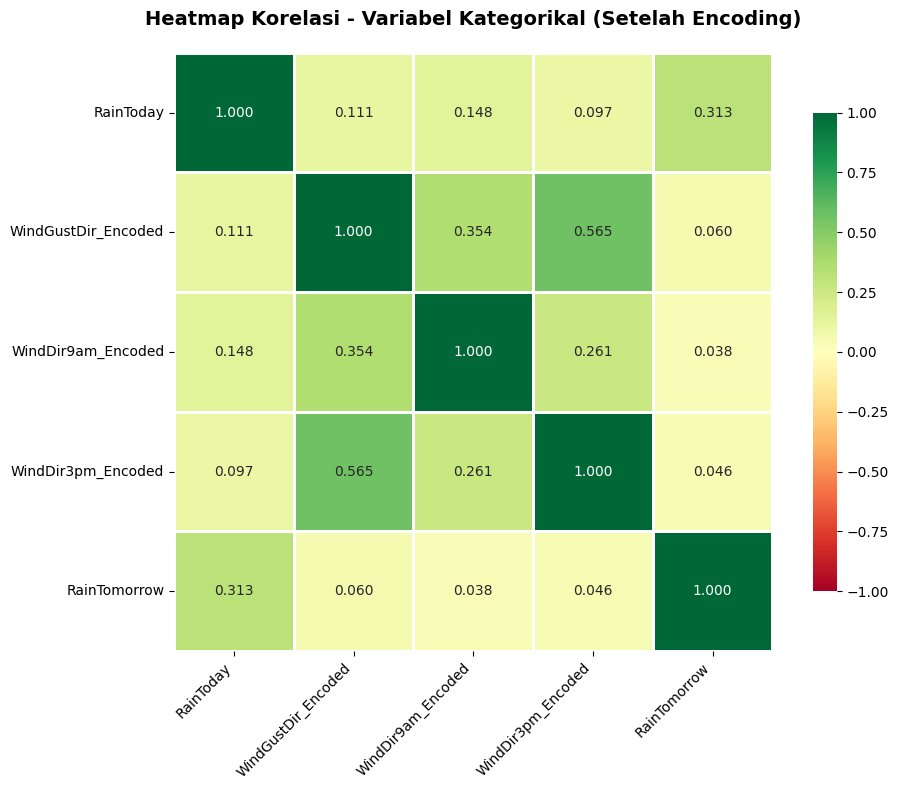

In [ ]:
categorical_encoded_df = df[encoded_columns]
correlation_matrix = categorical_encoded_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='RdYlGn',
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Heatmap Korelasi - Variabel Kategorikal (Setelah Encoding)',
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Imputasi

In [ ]:
# Daftar kolom kategorikal yang perlu diimputasi
# Sesuaikan nama kolom dengan dataframe Anda (lihat gambar 2 yang Anda upload)
cols_to_impute = [
    'RainToday',
    'WindGustDir_Encoded',
    'WindDir9am_Encoded',
    'WindDir3pm_Encoded'
]

# Loop untuk mengisi NaN dengan Modus di setiap kolom
for col in cols_to_impute:
    if col in df.columns:
        # Ambil modus (nilai terbanyak)
        mode_val = df[col].mode()[0]

        # Isi NaN
        df[col] = df[col].fillna(mode_val)

        print(f"✅ Kolom {col} diimputasi dengan nilai: {mode_val}")

# Cek ulang apakah masih ada NaN di kolom-kolom tersebut
print("\nSisa NaN:", df[cols_to_impute].isna().sum())

✅ Kolom RainToday diimputasi dengan nilai: 0.0
✅ Kolom WindGustDir_Encoded diimputasi dengan nilai: 12.0
✅ Kolom WindDir9am_Encoded diimputasi dengan nilai: 0.0
✅ Kolom WindDir3pm_Encoded diimputasi dengan nilai: 6.0

Sisa NaN: RainToday              0
WindGustDir_Encoded    0
WindDir9am_Encoded     0
WindDir3pm_Encoded     0
dtype: int64


## Feature Engineering Variabel Data Numeric

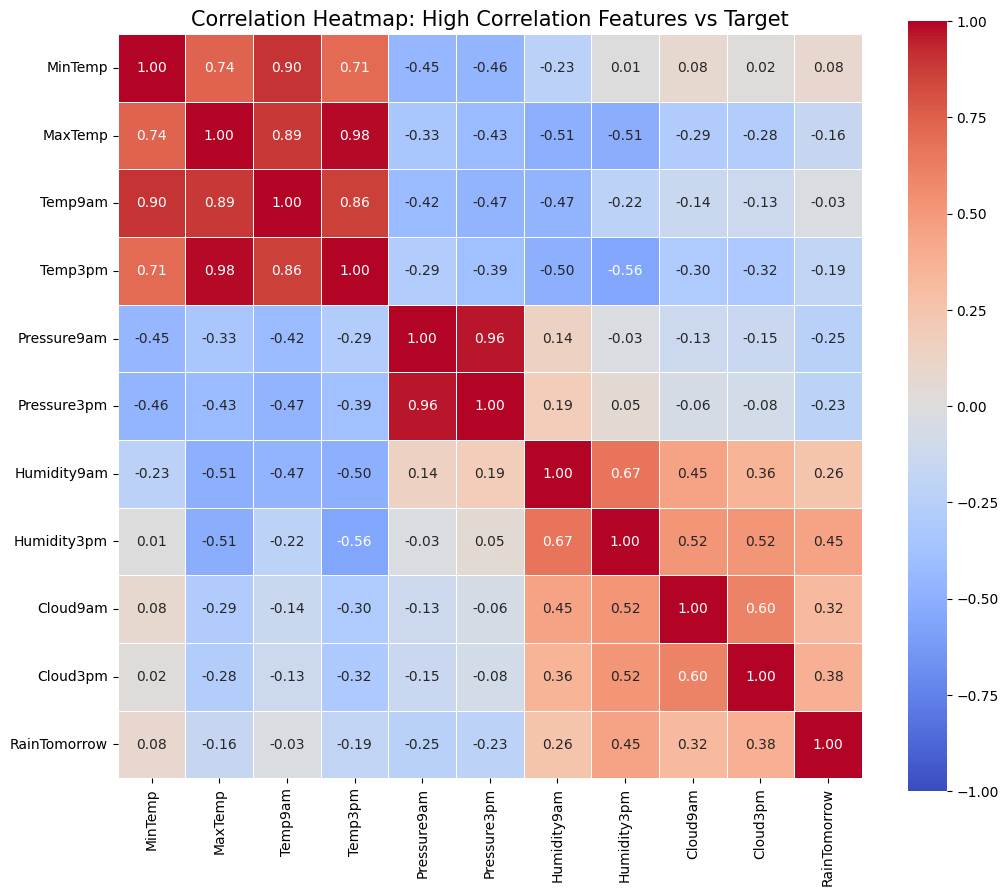

In [ ]:
cols_to_analyze = [
    'MinTemp', 'MaxTemp',
    'Temp9am', 'Temp3pm',
    'Pressure9am', 'Pressure3pm',
    'Humidity9am', 'Humidity3pm',
    'Cloud9am', 'Cloud3pm',
    'RainTomorrow'  # Target Variable
]

# 3. Hitung Matriks Korelasi
# method='pearson' adalah standar untuk hubungan linear
corr_matrix = df[cols_to_analyze].corr()

# 4. Plot Heatmap
plt.figure(figsize=(12, 10))

sns.heatmap(
    corr_matrix,
    annot=True,       # Menampilkan angka korelasi di dalam kotak
    fmt=".2f",        # Format 2 angka di belakang koma
    cmap='coolwarm',  # Warna: Merah (Positif), Biru (Negatif)
    vmin=-1, vmax=1,  # Range warna dari -1 sampai 1
    linewidths=0.5,   # Garis pemisah antar kotak
    square=True       # Agar kotak berbentuk persegi
)

plt.title('Correlation Heatmap: High Correlation Features vs Target', fontsize=15)
plt.show()

Korelasi tinggi yang saya lihat:

- MinTemp ↔ MaxTemp (0.74) ⚠️
- MinTemp ↔ Temp9am (0.90) ⚠️⚠️
- MaxTemp ↔ Temp3pm (0.98) ⚠️⚠️⚠️ SANGAT TINGGI!
- Temp9am ↔ Temp3pm (0.86) ⚠️
- Pressure9am ↔ Pressure3pm (0.96) ⚠️⚠️⚠️
- Humidity9am ↔ Humidity3pm (0.67)
- Cloud9am ↔ Cloud3pm (0.60)

In [ ]:
df.drop(['Temp9am','Temp3pm','Pressure3pm'],inplace= True,axis=1)

### Handling Outlier

In [ ]:
import pandas as pd

# 1. DEFINISIKAN KATEGORI KOLOM
# Rainfall butuh penanganan khusus karena 17% datanya dianggap outlier oleh metode standar
# Kita hanya akan membatasi bagian ATAS (Upper) karena Rainfall tidak mungkin minus.
col_special = ['Rainfall']

# Kolom lainnya bisa menggunakan pendekatan standar (batas atas & bawah)
cols_standard = [
    'WindGustSpeed', 'WindSpeed3pm', 'Evaporation', 'WindSpeed9am',
    'Humidity9am', 'Pressure9am', 'MaxTemp','MinTemp'
]

# 2. PROSES WINSORIZING

# --- STRATEGI A: RAINFALL (Hanya Upper Bound, dan lebih longgar) ---
# Kita gunakan quantile 0.99 (99%). Artinya kita biarkan 17% data "outlier" itu ada,
# dan hanya membatasi 1% nilai yang BENAR-BENAR EKSTREM (badai super).
# Ini penting agar model tetap bisa belajar pola hujan deras.
for col in col_special:
    if col in df.columns:
        upper_limit = df[col].quantile(0.99) # Batas 99%

        # Hanya batasi (cap) bagian atas, biarkan 0 tetap 0
        df[col] = df[col].clip(upper=upper_limit)

        print(f"✓ {col} (Special): Nilai dibatasi maksimal {upper_limit:.2f} (Top 1%)")

# --- STRATEGI B: KOLOM LAINNYA (Standard Winsorizing) ---
# Menggunakan batas 1% bawah dan 99% atas
lower_percentile = 0.01
upper_percentile = 0.99

for col in cols_standard:
    if col in df.columns:
        low_val = df[col].quantile(lower_percentile)
        high_val = df[col].quantile(upper_percentile)

        # Batasi (cap) nilai atas dan bawah
        df[col] = df[col].clip(lower=low_val, upper=high_val)

        print(f"✓ {col}: Nilai dibatasi minimal {low_val:.2f} dan maksimal {high_val:.2f}")

print("\nProses Winsorizing Selesai.")

✓ Rainfall (Special): Nilai dibatasi maksimal 37.40 (Top 1%)
✓ WindGustSpeed: Nilai dibatasi minimal 15.00 dan maksimal 81.00
✓ WindSpeed3pm: Nilai dibatasi minimal 2.00 dan maksimal 43.00
✓ Evaporation: Nilai dibatasi minimal 0.40 dan maksimal 18.40
✓ WindSpeed9am: Nilai dibatasi minimal 0.00 dan maksimal 39.00
✓ Humidity9am: Nilai dibatasi minimal 17.00 dan maksimal 100.00
✓ Pressure9am: Nilai dibatasi minimal 1000.20 dan maksimal 1034.00
✓ MaxTemp: Nilai dibatasi minimal 9.10 dan maksimal 40.10
✓ MinTemp: Nilai dibatasi minimal -1.80 dan maksimal 25.80

Proses Winsorizing Selesai.



--- PENGECEKAN ULANG OUTLIER SETELAH WINSORIZING ---
Total Baris Data: 142193
         Feature  Remaining Outliers (IQR Method)  Percentage
0       Rainfall                            25228       17.74
1  WindGustSpeed                             3006        2.11
2   WindSpeed3pm                             2458        1.73
3    Evaporation                             1954        1.37
4   WindSpeed9am                             1739        1.22
5    Humidity9am                             1419        1.00
6    Pressure9am                                0        0.00
7        MaxTemp                                0        0.00
8        MinTemp                                0        0.00


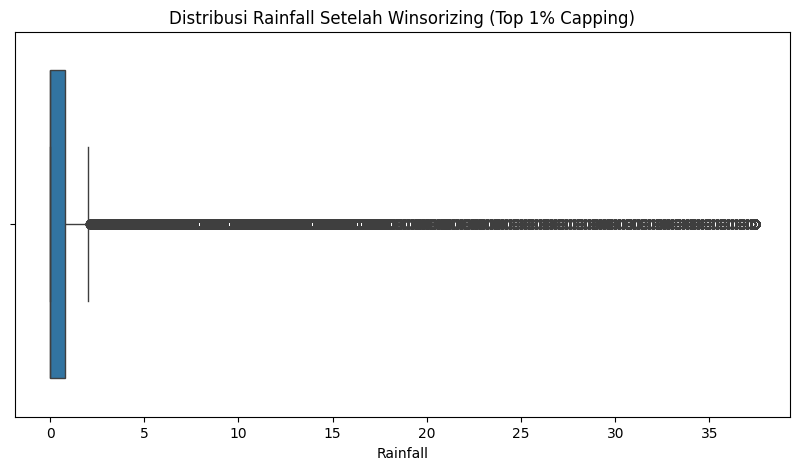

In [ ]:
print("\n--- PENGECEKAN ULANG OUTLIER SETELAH WINSORIZING ---")

# List untuk menyimpan hasil pengecekan
outlier_check = []

# Gabungkan semua kolom yang diproses
all_cols_processed = col_special + cols_standard

for col in all_cols_processed:
    if col in df.columns:
        # Hitung ulang batas IQR (Interquartile Range) untuk definisi outlier standar
        # Kita gunakan metode IQR standar untuk melihat apakah data masih dianggap "outlier" secara statistik
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Hitung jumlah data yang di luar batas IQR
        # Note: Untuk Rainfall, karena distribusi skewed, wajar jika masih terdeteksi outlier oleh metode IQR
        total_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        percentage = (total_outliers / len(df)) * 100

        outlier_check.append({
            'Feature': col,
            'Remaining Outliers (IQR Method)': total_outliers,
            'Percentage': round(percentage, 2)
        })

# Buat DataFrame hasil
df_outlier_result = pd.DataFrame(outlier_check)
df_outlier_result = df_outlier_result.sort_values(by='Percentage', ascending=False)

print(f"Total Baris Data: {len(df)}")
print(df_outlier_result)

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Rainfall'])
plt.title('Distribusi Rainfall Setelah Winsorizing (Top 1% Capping)')
plt.show()

### Handling Missing Values with imputation

In [ ]:
# Imputasi missing value
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
print(df.isnull().sum().sum())
df.isnull().sum()

0


,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0


### Encode Location

In [ ]:
# Unique values for locations

new_categorical['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
# Membuat dummy variables (0 dan 1)
location_dummies = pd.get_dummies(new_categorical, columns=['Location'], dtype=int)

# Lihat hasilnya
print(location_dummies.head())

  WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow  Location_Adelaide  \
0           W          W        WNW        No           No                  0   
1         WNW        NNW        WSW        No           No                  0   
2         WSW          W        WSW        No           No                  0   
3          NE         SE          E        No           No                  0   
4           W        ENE         NW        No           No                  0   

   Location_Albany  Location_Albury  Location_AliceSprings  \
0                0                1                      0   
1                0                1                      0   
2                0                1                      0   
3                0                1                      0   
4                0                1                      0   

   Location_BadgerysCreek  ...  Location_Townsville  Location_Tuggeranong  \
0                       0  ...                    0            

In [ ]:
# 1. One-hot encode Location
location_encoded = pd.get_dummies(df['Location'], prefix='Location', dtype=int)

In [ ]:
# 2. Gabungkan dengan df original
df = pd.concat([df, location_encoded], axis=1)

# 3. Drop kolom Location asli
df = df.drop('Location', axis=1)

print(f"Shape setelah encoding: {df.shape}")
print(f"Kolom baru: {location_encoded.columns.tolist()}")

Shape setelah encoding: (142193, 70)
Kolom baru: ['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', '

In [ ]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,4.8,8.5,31.0,15.0,13.0,59.0,27.0,...,0,0,1,0,0,0,0,0,0,0
145455,2.8,23.4,0.0,4.8,8.5,31.0,13.0,11.0,51.0,24.0,...,0,0,1,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,4.8,8.5,22.0,13.0,9.0,56.0,21.0,...,0,0,1,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,4.8,8.5,37.0,9.0,9.0,53.0,24.0,...,0,0,1,0,0,0,0,0,0,0


# Data Modelling Semua Variabel

##Data Split

In [ ]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah sampel training (80%): {len(X_train)}")
print(f"Jumlah sampel testing (20%): {len(X_test)}")

Jumlah sampel training (80%): 113754
Jumlah sampel testing (20%): 28439


##Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
#Prediksi Data Training
Y_pred_rf_train = rf_model.predict(X_train)
rf_train = accuracy_score(y_train, Y_pred_rf_train)
#Prediksi Data Testing
Y_pred_rf_test = rf_model.predict(X_test)
rf_test = accuracy_score(y_test, Y_pred_rf_test)

print("Random Forest Training Accuracy:",rf_train )
print("Random Forest Testing Accuracy:",rf_test )

Random Forest Training Accuracy: 0.9999912091003393
Random Forest Testing Accuracy: 0.858961285558564


In [ ]:
report_rf = classification_report(y_test, Y_pred_rf_test)
print ("Laporan Klasifikasi Metode CatBoost")
print(report_rf)

Laporan Klasifikasi Metode CatBoost
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22064
           1       0.79      0.50      0.62      6375

    accuracy                           0.86     28439
   macro avg       0.83      0.73      0.76     28439
weighted avg       0.85      0.86      0.85     28439



##XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Prediksi Data Training
Y_pred_xgb_train = xgb_model.predict(X_train)
xgb_train = accuracy_score(y_train, Y_pred_xgb_train)

# Prediksi Data Testing
Y_pred_xgb_test = xgb_model.predict(X_test)
xgb_test = accuracy_score(y_test, Y_pred_xgb_test)

print("XGBoost Training Accuracy:", xgb_train)
print("XGBoost Testing Accuracy:", xgb_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[17:42:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Training Accuracy: 0.8876610932362818
XGBoost Testing Accuracy: 0.8610007384225887


In [ ]:
report_xgb = classification_report(y_test, Y_pred_xgb_test)
print ("Laporan Klasifikasi Metode CatBoost")
print(report_xgb)

Laporan Klasifikasi Metode CatBoost
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22064
           1       0.76      0.56      0.64      6375

    accuracy                           0.86     28439
   macro avg       0.82      0.75      0.78     28439
weighted avg       0.85      0.86      0.85     28439




Feature Importance (Tanpa Location):
                Feature  Importance
9           Humidity3pm    0.128210
5         WindGustSpeed    0.039386
12             Cloud3pm    0.029056
4              Sunshine    0.027977
2              Rainfall    0.024971
10          Pressure9am    0.018259
19   WindDir3pm_Encoded    0.015701
18   WindDir9am_Encoded    0.011412
0               MinTemp    0.009599
17  WindGustDir_Encoded    0.009333
8           Humidity9am    0.008833
1               MaxTemp    0.007850
15                Month    0.007700
6          WindSpeed9am    0.007657
7          WindSpeed3pm    0.007613
11             Cloud9am    0.006614
3           Evaporation    0.006323
14                 Year    0.006088
16                  Day    0.005526
13            RainToday    0.000000


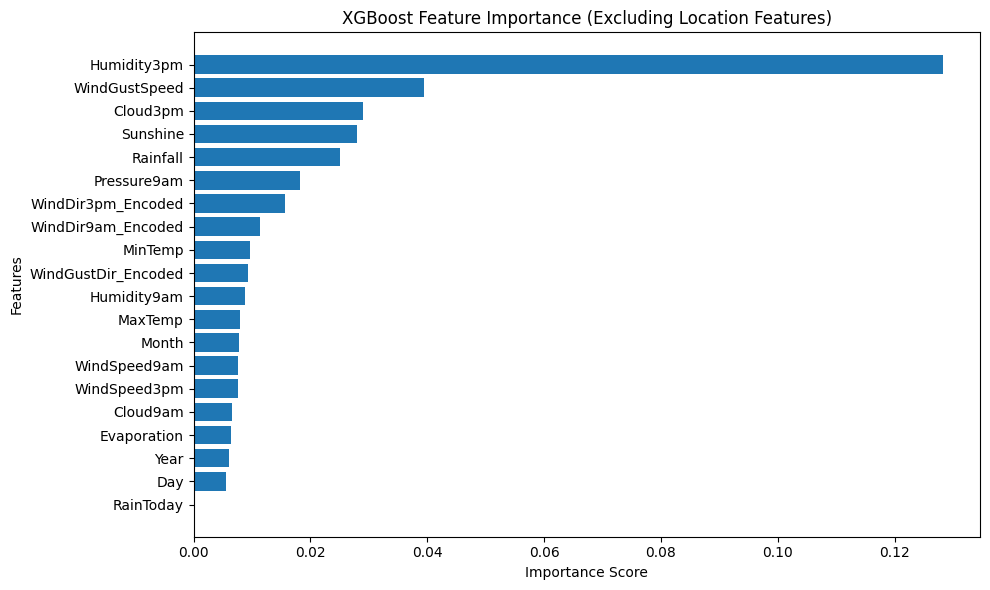


Top 10 Most Important Features (Excluding Location):
                Feature  Importance
9           Humidity3pm    0.128210
5         WindGustSpeed    0.039386
12             Cloud3pm    0.029056
4              Sunshine    0.027977
2              Rainfall    0.024971
10          Pressure9am    0.018259
19   WindDir3pm_Encoded    0.015701
18   WindDir9am_Encoded    0.011412
0               MinTemp    0.009599
17  WindGustDir_Encoded    0.009333


In [ ]:
# Dapatkan feature importance
feature_importance = xgb_model.feature_importances_
feature_names = X_train.columns

# Buat DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Filter: EXCLUDE fitur yang mengandung 'Location'
importance_df_no_location = importance_df[~importance_df['Feature'].str.contains('Location', case=False)]

print("\nFeature Importance (Tanpa Location):")
print(importance_df_no_location)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(importance_df_no_location['Feature'], importance_df_no_location['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance (Excluding Location Features)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Top 10 (tanpa Location)
print("\nTop 10 Most Important Features (Excluding Location):")
print(importance_df_no_location.head(10))

Hasil: Akurasi mentok 86 untuk banyak model, preprocessing data perlu diotak atik lagi agar akurasi meningkat. atau pengaturan parameter model nya (Soon)

# Data Modelling Tanpa Min Max Temp

##Data Split

In [ ]:
X = df.drop(['RainTomorrow','MaxTemp','MinTemp'], axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah sampel training (80%): {len(X_train)}")
print(f"Jumlah sampel testing (20%): {len(X_test)}")

Jumlah sampel training (80%): 113754
Jumlah sampel testing (20%): 28439


##Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
#Prediksi Data Training
Y_pred_rf_train = rf_model.predict(X_train)
rf_train = accuracy_score(y_train, Y_pred_rf_train)
#Prediksi Data Testing
Y_pred_rf_test = rf_model.predict(X_test)
rf_test = accuracy_score(y_test, Y_pred_rf_test)

print("Random Forest Training Accuracy:",rf_train )
print("Random Forest Testing Accuracy:",rf_test )

Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 0.8561834101058405


In [ ]:
report_rf = classification_report(y_test, Y_pred_rf_test)
print ("Laporan Klasifikasi Metode CatBoost")
print(report_rf)

Laporan Klasifikasi Metode CatBoost
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22064
           1       0.78      0.50      0.61      6375

    accuracy                           0.86     28439
   macro avg       0.82      0.73      0.76     28439
weighted avg       0.85      0.86      0.84     28439



##XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Prediksi Data Training
Y_pred_xgb_train = xgb_model.predict(X_train)
xgb_train = accuracy_score(y_train, Y_pred_xgb_train)

# Prediksi Data Testing
Y_pred_xgb_test = xgb_model.predict(X_test)
xgb_test = accuracy_score(y_test, Y_pred_xgb_test)

print("XGBoost Training Accuracy:", xgb_train)
print("XGBoost Testing Accuracy:", xgb_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[17:45:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Training Accuracy: 0.884716141849957
XGBoost Testing Accuracy: 0.8582580259502796


In [ ]:
report_xgb = classification_report(y_test, Y_pred_xgb_test)
print ("Laporan Klasifikasi Metode CatBoost")
print(report_xgb)

Laporan Klasifikasi Metode CatBoost
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22064
           1       0.75      0.55      0.64      6375

    accuracy                           0.86     28439
   macro avg       0.82      0.75      0.77     28439
weighted avg       0.85      0.86      0.85     28439




Feature Importance (Tanpa Location):
                Feature  Importance
7           Humidity3pm    0.119548
3         WindGustSpeed    0.036315
2              Sunshine    0.028609
10             Cloud3pm    0.024906
0              Rainfall    0.024290
8           Pressure9am    0.017863
17   WindDir3pm_Encoded    0.016517
16   WindDir9am_Encoded    0.011562
15  WindGustDir_Encoded    0.009820
6           Humidity9am    0.009523
13                Month    0.008131
5          WindSpeed3pm    0.007871
4          WindSpeed9am    0.007328
1           Evaporation    0.006780
12                 Year    0.006252
14                  Day    0.005928
9              Cloud9am    0.005913
11            RainToday    0.000000


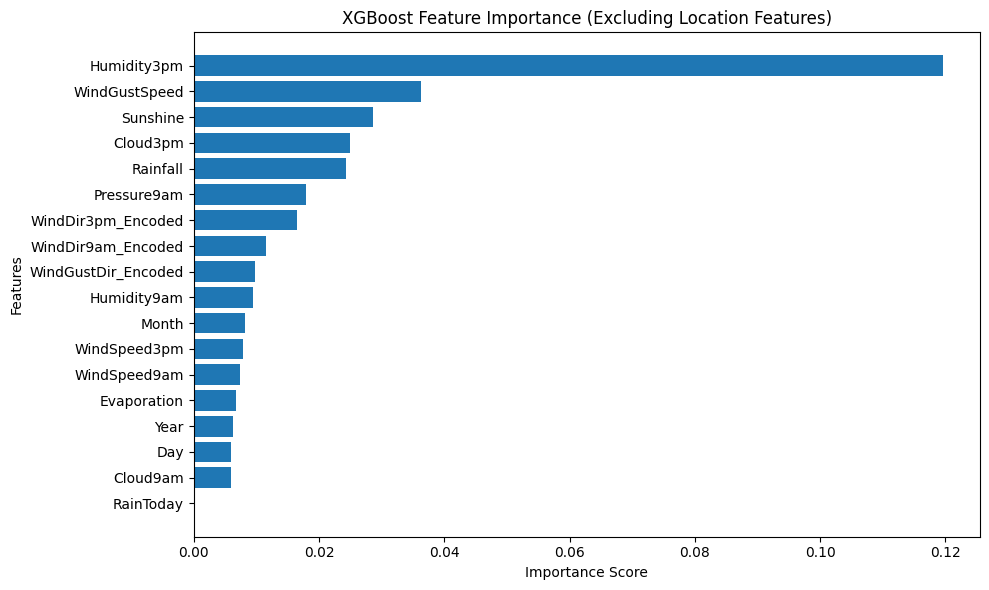


Top 10 Most Important Features (Excluding Location):
                Feature  Importance
7           Humidity3pm    0.119548
3         WindGustSpeed    0.036315
2              Sunshine    0.028609
10             Cloud3pm    0.024906
0              Rainfall    0.024290
8           Pressure9am    0.017863
17   WindDir3pm_Encoded    0.016517
16   WindDir9am_Encoded    0.011562
15  WindGustDir_Encoded    0.009820
6           Humidity9am    0.009523


In [ ]:
# Dapatkan feature importance
feature_importance = xgb_model.feature_importances_
feature_names = X_train.columns

# Buat DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Filter: EXCLUDE fitur yang mengandung 'Location'
importance_df_no_location = importance_df[~importance_df['Feature'].str.contains('Location', case=False)]

print("\nFeature Importance (Tanpa Location):")
print(importance_df_no_location)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(importance_df_no_location['Feature'], importance_df_no_location['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance (Excluding Location Features)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Top 10 (tanpa Location)
print("\nTop 10 Most Important Features (Excluding Location):")
print(importance_df_no_location.head(10))

Hasil: Akurasi mentok 86 untuk banyak model, preprocessing data perlu diotak atik lagi agar akurasi meningkat. atau pengaturan parameter model nya (Soon)